In [1]:
import nltk
import requests
from nltk.corpus import stopwords
import pandas as pd
import random
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import string

from nltk.tokenize import word_tokenize
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
from translate import Translator

In [2]:
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /home/boron/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /home/boron/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/boron/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/boron/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import csv
from collections import Counter
from io import BytesIO
from pathlib import Path

import requests

In [4]:
import requests
GUTENBERG_CSV_URL = "https://www.gutenberg.org/cache/epub/feeds/pg_catalog.csv.gz"

r = requests.get(GUTENBERG_CSV_URL)
csv_text = r.content.decode("utf-8")
open('gutenberg_directory.csv', 'w').write(csv_text)

14836792

In [5]:
df = pd.read_csv('gutenberg_directory.csv')
df_eng = df.loc[df['Language'] == 'en']
df_de = df.loc[df['Language'] == 'de']
# print(df_eng)
df_de

/tmp/ipykernel_1539926/2793548645.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('gutenberg_directory.csv')


,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
2023,2054,Text,2000-01-01,Iphigenie auf Tauris,de,"Goethe, Johann Wolfgang von, 1749-1832",Iphigenia (Mythological character) -- Drama,PT,DE Drama
2114,2146,Text,2000-04-01,Egmont,de,"Goethe, Johann Wolfgang von, 1749-1832","Egmont, Lamoraal, Graaf van, 1522-1568 -- Dram...",PT,Harvard Classics; DE Drama
2142,2174,Text,2000-05-01,Frau und Kindern auf der Spur,de,"Rohner, Gerold K.",Fiction; Western stories,PT,DE Prosa
2155,2187,Text,2000-05-01,Oberon,de,"Wieland, Christoph Martin, 1733-1813",German poetry -- 18th century,PT,Opera; DE Lyrik
2156,2188,Text,2000-05-01,Die Aufzeichnungen des Malte Laurids Brigge,de,"Rilke, Rainer Maria, 1875-1926",Paris (France) -- Fiction; Stream of conscious...,PT,DE Prosa
...,...,...,...,...,...,...,...,...,...
73293,73374,Text,2024-04-10,Geschichte der Zoologie,de,"Burckhardt, Rudolf, 1866-1908",Zoology -- History,QL,NaN
73386,73467,Text,2024-04-26,Das goldene Tor,de,"Speckmann, Diedrich, 1872-1938",German fiction -- 20th century,PT,NaN
73398,73479,Text,2024-04-27,Erinnerungen eines alten Leipzigers,de,"Lippold, Adolf, 1815-1895; Wolff, Richard [Ill...","Lippold, Adolf, 1815-1895; Leipzig (Germany) -...",DD,NaN
73399,73480,Text,2024-04-27,Grundriß der Logik,de,"Grau, Kurt Joachim, 1891-1947",Logic,BC,NaN


In [6]:
df.loc[df['Authors'] == 'Goethe, Johann Wolfgang von, 1749-1832']

,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
2023,2054,Text,2000-01-01,Iphigenie auf Tauris,de,"Goethe, Johann Wolfgang von, 1749-1832",Iphigenia (Mythological character) -- Drama,PT,DE Drama
2114,2146,Text,2000-04-01,Egmont,de,"Goethe, Johann Wolfgang von, 1749-1832","Egmont, Lamoraal, Graaf van, 1522-1568 -- Dram...",PT,Harvard Classics; DE Drama
2195,2228,Text,2000-06-01,Reineke Fuchs,de,"Goethe, Johann Wolfgang von, 1749-1832",German poetry -- 18th century; Epic poetry; Re...,PT,DE Lyrik
2196,2229,Text,2000-06-01,Faust: Der Tragödie erster Teil,de,"Goethe, Johann Wolfgang von, 1749-1832",German poetry; Legends -- Germany -- Drama; Fa...,PT,Best Books Ever Listings; Harvard Classics; DE...
2197,2230,Text,2000-06-01,Faust: Der Tragödie zweiter Teil,de,"Goethe, Johann Wolfgang von, 1749-1832",German poetry; Legends -- Germany -- Drama; Fa...,PT,Best Books Ever Listings; DE Drama
2279,2312,Text,2000-09-01,Hermann und Dorothea,de,"Goethe, Johann Wolfgang von, 1749-1832",German poetry -- 18th century,PT,Harvard Classics; DE Lyrik
2286,2319,Text,2000-09-01,West-östlicher Divan,de,"Goethe, Johann Wolfgang von, 1749-1832",German poetry -- 19th century,PT,DE Lyrik
2287,2320,Text,2000-09-01,Novelle,de,"Goethe, Johann Wolfgang von, 1749-1832",Nobility -- Fiction,PT,DE Prosa
2288,2321,Text,2000-09-01,Götz von Berlichingen mit der eisernen Hand: E...,de,"Goethe, Johann Wolfgang von, 1749-1832","Berlichingen, Götz von, 1480-1562 -- Drama",PT,DE Drama
2302,2335,Text,2000-09-01,Wilhelm Meisters Lehrjahre — Band 1,de,"Goethe, Johann Wolfgang von, 1749-1832","Bildungsromans; Theater, Traveling -- Fiction",PT,Opera; Harvard Classics; DE Prosa


In [7]:
en_ids = [5200, 7849, 4280, 45605, 58344, 1998, 6782, 6792]
de_ids = [22367, 69327, 6342, 45579, 2499, 7205, 47804, 6383]

In [8]:
def get_de_books_by_topic(id):
    return df_de[df_de['Text#'] == id]

In [9]:
def get_en_books_by_topic(id):
    return df_eng[df_eng['Text#'] == id]

In [10]:
get_de_books_by_topic(22367)

,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
22296,22367,Text,2007-08-21,Die Verwandlung,de,"Kafka, Franz, 1883-1924",Psychological fiction; Metamorphosis -- Fiction,PT,DE Prosa


In [11]:
# https://skeptric.com/gutenberg/

In [12]:
GUTENBERG_TEXT_URL = "https://www.gutenberg.org/ebooks/{id}.txt.utf-8"

In [13]:
GUTENBERG_ROBOT_URL = "http://www.gutenberg.org/robot/harvest?filetypes[]=txt"
r = requests.get(GUTENBERG_ROBOT_URL)
print(r.text[:750])

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">

<html lang="en">
  <head>
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
    <title>All Files (offset: 0, filetypes: txt) - Project Gutenberg</title>
  </head>
  <body>
    <h1>All Files (offset: 0, filetypes: txt)</h1>    <p><a href="http://aleph.gutenberg.org/1/2/3/7/12370/12370-8.zip">http://aleph.gutenberg.org/1/2/3/7/12370/12370-8.zip</a></p>

    <p><a href="http://aleph.gutenberg.org/1/2/3/7/12370/12370.zip">http://aleph.gutenberg.org/1/2/3/7/12370/12370.zip</a></p>

    <p><a href="http://aleph.gutenberg.org/1/2/3/7/12372/12372-8.zip">http://aleph.gutenberg.org/1/2/3/7/12372/12372-8.zip</a></p>

    <p><a href="http:/


In [14]:
import re

GUTENBERG_MIRROR = re.search('(https?://[^/]+)[^"]*.zip', r.text).group(1)
GUTENBERG_MIRROR

'http://aleph.gutenberg.org'

In [15]:
def gutenberg_text_urls(id: str, mirror=GUTENBERG_MIRROR, suffixes=("", "-8", "-0")) -> list[str]:
    path = "/".join(id[:-1]) or "0"
    return [f"{mirror}/{path}/{id}/{id}{suffix}.zip" for suffix in suffixes]

In [16]:
GUTENBERG_TEXT = "PROJECT GUTENBERG EBOOK "

In [17]:
def strip_headers(text):
    in_text = False
    output = []

    for line in text.splitlines():
        if GUTENBERG_TEXT in line:
            if not in_text:
                in_text = True
            else:
                break
        else:
            if in_text:
                output.append(line)

    return "\n".join(output).strip()

In [18]:
def book_text(book_id):
    r = requests.get(GUTENBERG_TEXT_URL.format(id=book_id))
    text = r.text
    clean_text = strip_headers(text)
    return clean_text

In [19]:
data_path = Path("data")
data_path.mkdir(exist_ok=True)

In [20]:
def tokenize_preprocess(text):
  no_punc = "".join([ch for ch in text if ch not in string.punctuation])
  split_text = re.split('\s+', no_punc)
  tokens = [x.lower() for x in split_text]
  return [x for x in tokens if (len(x) > 3) and x.isalpha() and (x not in nltk.corpus.stopwords.words('english') and x not in ['gutenberg', 'project', 'projectgutenberg', 'produced', 'footnote', 'index', '2007', 'macmillan'])]

In [21]:
def stem_text(text, lang):
  stemmer = SnowballStemmer(language=lang)
  return [stemmer.stem(word) for word in text]

In [22]:
def lemmatize_text(text):
  word_net = WordNetLemmatizer()
  return [word_net.lemmatize(word) for word in text]

In [23]:
final_df_de = pd.DataFrame({'Topic': pd.Series(dtype='str'),
                   'Title': pd.Series(dtype='str'),
                   'Author': pd.Series(dtype='str'),
                   'Text': pd.Series(dtype='str')})
for de_id in de_ids:
  de_book_df = get_de_books_by_topic(de_id)
  print("------------------------------")
  # print(book_df.head)
  count = 0
  for i, book in de_book_df.iterrows():
    print(book)
    if count < 15:
      id = book["Text#"]
      text = book_text(id)
      title = book['Title']
      authors = book['Authors']
      print(f"Processing {book['Title']} by {book['Authors']} containing {len(text):_} characters...")
      preprocessed_text = word_tokenize(" ".join(stem_text(tokenize_preprocess(text), 'german')))
      print(preprocessed_text)
      final_df_de.loc[len(final_df_de)] = [de_id, title, authors, preprocessed_text]
      count += 1
    else:
      continue
  print("------------------------------")

------------------------------
Text#                                                    22367
Type                                                      Text
Issued                                              2007-08-21
Title                                          Die Verwandlung
Language                                                    de
Authors                                Kafka, Franz, 1883-1924
Subjects       Psychological fiction; Metamorphosis -- Fiction
LoCC                                                        PT
Bookshelves                                           DE Prosa
Name: 22296, dtype: object
Processing Die Verwandlung by Kafka, Franz, 1883-1924 containing 121_653 characters...
['jana', 'srna', 'alexand', 'bau', 'onlin', 'distributed', 'proofreading', 'team', 'httpwwwpgdpnet', 'verwandl', 'franz', 'kafka', 'gedruckt', 'dietsch', 'bruckn', 'weimar', 'copyright', 'kurt', 'wolff', 'verlag', 'leipzig', 'gregor', 'samsa', 'ein', 'morg', 'unruh', 'traum', 'erwacht', 

In [24]:
final_df_en = pd.DataFrame({'Topic': pd.Series(dtype='str'),
                   'Title': pd.Series(dtype='str'),
                   'Author': pd.Series(dtype='str'),
                   'Text': pd.Series(dtype='str')})
for en_id in en_ids:
  en_book_df = get_en_books_by_topic(en_id)
  print("------------------------------")
  print(f"Text# : {en_id}")
  # print(book_df.head)
  count = 0
  for i, book in en_book_df.iterrows():
    if count < 15:
      id = book["Text#"]
      text = book_text(id)
      title = book['Title']
      authors = book['Authors']
      print(f"Processing {book['Title']} by {book['Authors']} containing {len(text):_} characters...")
      preprocessed_text = word_tokenize(" ".join(lemmatize_text(stem_text(tokenize_preprocess(text), 'english'))))
      # print(preprocessed_text)
      final_df_en.loc[len(final_df_en)] = [en_id, title, authors, preprocessed_text]
      count += 1
    else:
      continue
  print("------------------------------")

------------------------------
Text# : 5200
Processing Metamorphosis by Kafka, Franz, 1883-1924; Wyllie, David (Translator) [Translator] containing 118_477 characters...
------------------------------
------------------------------
Text# : 7849
Processing The Trial by Kafka, Franz, 1883-1924; Wyllie, David (Translator) [Translator] containing 449_767 characters...
------------------------------
------------------------------
Text# : 4280
Processing The Critique of Pure Reason by Kant, Immanuel, 1724-1804; Meiklejohn, J. M. D. (John Miller Dow), 1830-1902 [Translator] containing 1_270_141 characters...
------------------------------
------------------------------
Text# : 45605
Processing Auguste Rodin by Rilke, Rainer Maria, 1875-1926; Lemont, Jessie [Translator]; Trausil, Hans, 1890- [Translator] containing 88_988 characters...
------------------------------
------------------------------
Text# : 58344
Processing Siddhartha: A Poem of India by Hesse, Hermann, 1877-1962; Wyllie, David (

In [25]:
# final_df_en.to_pickle("./final_preprocessed_text.pkl")

In [26]:
# final_df = pd.read_pickle("./final_preprocessed_text.pkl")

In [27]:
print(final_df_en[['Title', 'Author']].style.to_latex())

\begin{tabular}{lll}
 & Title & Author \\
0 & Metamorphosis & Kafka, Franz, 1883-1924; Wyllie, David (Translator) [Translator] \\
1 & The Trial & Kafka, Franz, 1883-1924; Wyllie, David (Translator) [Translator] \\
2 & The Critique of Pure Reason & Kant, Immanuel, 1724-1804; Meiklejohn, J. M. D. (John Miller Dow), 1830-1902 [Translator] \\
3 & Auguste Rodin & Rilke, Rainer Maria, 1875-1926; Lemont, Jessie [Translator]; Trausil, Hans, 1890- [Translator] \\
4 & Siddhartha: A Poem of India & Hesse, Hermann, 1877-1962; Wyllie, David (Translator) [Translator] \\
5 & Thus Spake Zarathustra: A Book for All and None & Nietzsche, Friedrich Wilhelm, 1844-1900; Common, Thomas, 1850-1919 [Translator] \\
6 & The Robbers & Schiller, Friedrich, 1759-1805 \\
7 & The Maid of Orleans: A Tragedy & Schiller, Friedrich, 1759-1805; Swanwick, Anna, 1813-1899 [Translator] \\
\end{tabular}



In [28]:
print(final_df_de[['Title', 'Author']].style.to_latex())

\begin{tabular}{lll}
 & Title & Author \\
0 & Die Verwandlung & Kafka, Franz, 1883-1924 \\
1 & Der Prozess: Roman & Kafka, Franz, 1883-1924 \\
2 & Kritik der reinen Vernunft
(Erste Fassung 1781) & Kant, Immanuel, 1724-1804 \\
3 & Auguste Rodin
Mit 96 Vollbildern & Rilke, Rainer Maria, 1875-1926 \\
4 & Siddhartha: eine indische Dichtung & Hesse, Hermann, 1877-1962 \\
5 & Also sprach Zarathustra: Ein Buch für Alle und Keinen & Nietzsche, Friedrich Wilhelm, 1844-1900 \\
6 & Die Räuber: Ein Schauspiel & Schiller, Friedrich, 1759-1805 \\
7 & Die Jungfrau von Orleans & Schiller, Friedrich, 1759-1805 \\
\end{tabular}



In [29]:
# @title Topic

from matplotlib import pyplot as plt
import seaborn as sns
#final_df.groupby('Topic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
#plt.gca().spines[['top', 'right',]].set_visible(False)

# print(final_df_de.groupby('Topic').size().to_latex())

In [30]:


import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gensim
%pylab inline



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['text', 'title', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [31]:
num_features = 300
min_word_count = 20
num_workers = multiprocessing.cpu_count()
context_size = 10
downsampling = 1e-4
seed = 2

In [32]:
books2vec_de = w2v.Word2Vec(
    sg=1, #skip-gram
    seed=seed,
    workers=num_workers,
    vector_size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

books2vec_en = w2v.Word2Vec(
    sg=1, #skip-gram
    seed=seed,
    workers=num_workers,
    vector_size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [33]:
X_de = final_df_de['Text']
# y_de = final_df_de['Topic']
# encoder = LabelEncoder()
# y_de = encoder.fit_transform(y_de)

In [34]:
X_en = final_df_en['Text']
# y_en = final_df_en['Topic']
# encoder = LabelEncoder()
# y_en = encoder.fit_transform(y_en)

In [35]:
X_de

0    [jana, srna, alexand, bau, onlin, distributed,...
1    [franz, kafka, prozess, roman, verlag, schmied...
2    [text, derived, html, fil, projekt, prepared, ...
3    [august, rodin, rain, maria, rilk, vollbild, i...
4    [michael, pull, assistanc, stefan, lang, scann...
5    [cov, also, sprach, zarathustra, buch, all, ke...
6    [jana, srna, pet, beck, onlin, distributed, pr...
7    [friedrich, schill, jungfrau, orlean, ein, rom...
Name: Text, dtype: object

In [36]:
X_en

0    [metamorphosi, franz, kafka, translat, david, ...
1    [trial, franz, kafka, translat, copyright, dav...
2    [illustr, critiqu, pure, reason, immanuel, kan...
3    [august, rodin, rainer, maria, rilk, translat,...
4    [copyright, david, wylli, translat, licens, cr...
5    [thus, spake, zarathustra, book, none, friedri...
6    [david, widger, robber, frederich, schiller, s...
7    [tapio, riikonen, david, widger, maid, orlean,...
Name: Text, dtype: object

In [37]:
books2vec_de.build_vocab(X_de)
books2vec_en.build_vocab(X_en)

In [38]:
print("books2vec vocabulary length:", books2vec_de)
print("books2vec vocabulary length:", books2vec_en)

books2vec vocabulary length: Word2Vec<vocab=1848, vector_size=300, alpha=0.025>
books2vec vocabulary length: Word2Vec<vocab=1943, vector_size=300, alpha=0.025>


In [39]:
books2vec_de.train(X_de, total_examples=len(X_de), epochs=5)

(321304, 1512510)

In [40]:
books2vec_en.train(X_en, total_examples=len(X_en), epochs=5)

(314370, 1215525)

In [41]:
all_word_vectors_matrix_de = books2vec_de.wv.vectors

In [42]:
all_word_vectors_matrix_en = books2vec_en.wv.vectors

In [44]:
from deep_translator import GoogleTranslator
import os

de_vocab = books2vec_de.wv.index_to_key
translator= GoogleTranslator(source='de', target='en')

check = os.path.isfile('./de-en-gen.tsv')

if not check:
    f = open("de-en-gen.tsv", "w+")
    for i in de_vocab:
        translation = lemmatize_text(stem_text([translator.translate(i)], 'english'))[0]
        print(f"{i}\t{translation}\n")
        f.write(f"{i}\t{translation}\n")
    f.close()

In [45]:
tsne = sklearn.manifold.TSNE(n_components = 2,
                             early_exaggeration = 6,
                             learning_rate = 500,
                             n_iter = 2000,
                             random_state = 2)

In [46]:
all_word_vectors_matrix_2d_de = tsne.fit_transform(all_word_vectors_matrix_de)

In [47]:
all_word_vectors_matrix_2d_en = tsne.fit_transform(all_word_vectors_matrix_en)

In [48]:
points_de = pd.DataFrame(
    [(word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d_de[books2vec_de.wv.key_to_index[word]])
            for word in books2vec_de.wv.key_to_index
        ]],
    columns=["word", "x", "y"])


In [49]:
points_en = pd.DataFrame(
    [(word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d_en[books2vec_en.wv.key_to_index[word]])
            for word in books2vec_en.wv.key_to_index
        ]],
    columns=["word", "x", "y"])


In [50]:
points_de[100:105]

,word,x,y
100,auss,68.503555,-5.626003
101,macht,10.635045,-0.889605
102,aug,-21.702341,-0.595248
103,sag,16.712080,4.593202
104,sehr,7.132185,-43.357552


In [51]:
points_en[100:105]

,word,x,y
100,differ,65.340645,8.136137
101,although,40.956112,19.716820
102,soul,-22.212835,-32.728584
103,right,27.628824,34.516418
104,siddhartha,-42.471554,31.208836


Text(0.5, 1.0, 'DE tSNE')

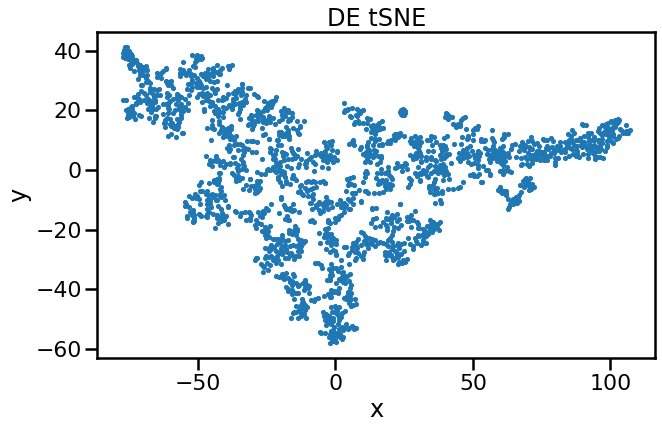

In [52]:
sns.set_context("poster")
ax = points_de.plot.scatter("x", "y", s=10, figsize=(10, 6))
ax.set_title('DE tSNE')

Text(0.5, 1.0, 'EN tSNE')

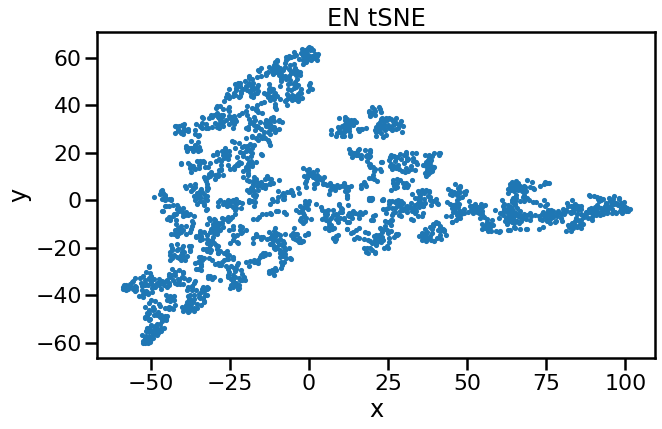

In [53]:
sns.set_context("poster")
ax = points_en.plot.scatter("x", "y", s=10, figsize=(10, 6))
ax.set_title('EN tSNE')

In [54]:
def plot_region(x_bounds, y_bounds, points):
    slice = points[(x_bounds[0] <= points.x) & (points.x <= x_bounds[1]) &
                   (y_bounds[0] <= points.y) & (points.y <= y_bounds[1])]

    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 6))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [111]:
zk = points_de[points_de.word == 'zukunft']
zk

,word,x,y
815,zukunft,-38.694839,33.703117


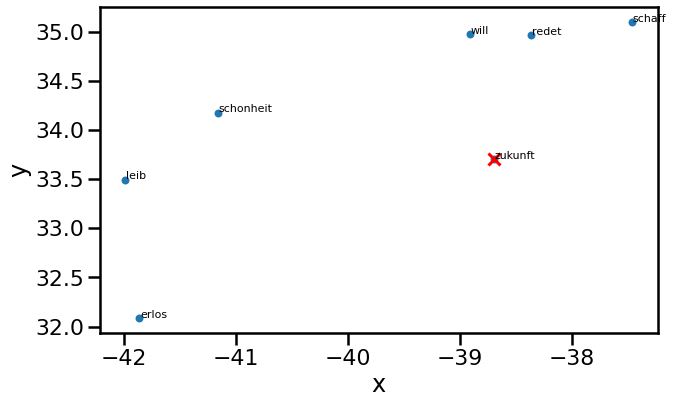

In [116]:
plot_region(x_bounds=(-42, -30), y_bounds=(29, 37), points=points_de)
plt.scatter(zk['x'], zk['y'], color="red", marker="x")

In [121]:
fe = points_de[points_de.word == 'fern']
fe

,word,x,y
353,fern,-23.636461,5.893243


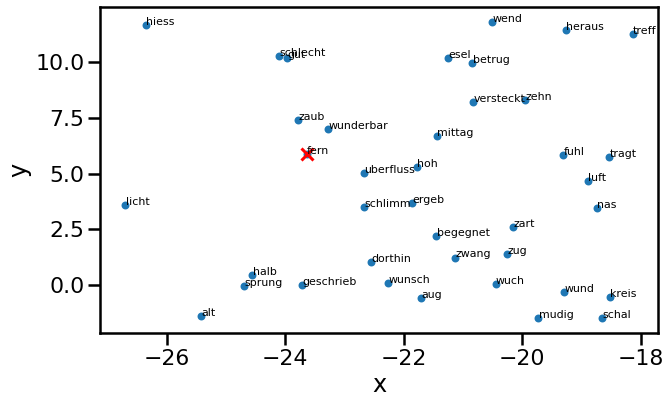

In [122]:
plot_region(x_bounds=(-27, -18), y_bounds=(-2, 12), points=points_de)
plt.scatter(fe['x'], fe['y'], color="red", marker="x")

In [118]:
future = points_en[points_en.word == 'futur']
future

,word,x,y
509,futur,6.263608,-12.637799


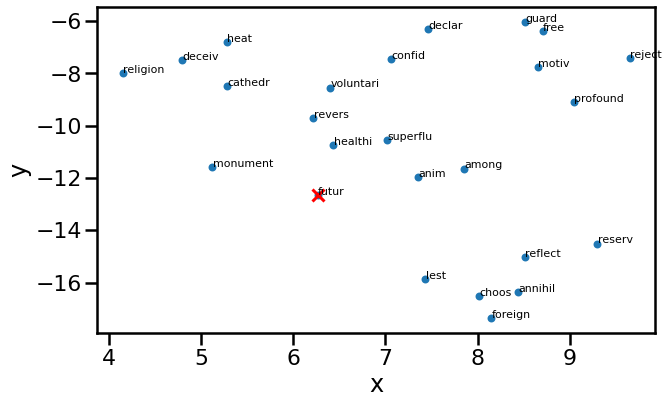

In [119]:
plot_region(x_bounds=(2, 10), y_bounds=(-18, -6), points=points_en)
plt.scatter(future['x'], future['y'], color="red", marker="x")

In [57]:
stem_text(["knew"], 'english')[0]

'knew'

In [58]:
points_en[points_en.word == "knew"]

,word,x,y
426,knew,-36.086376,29.477287


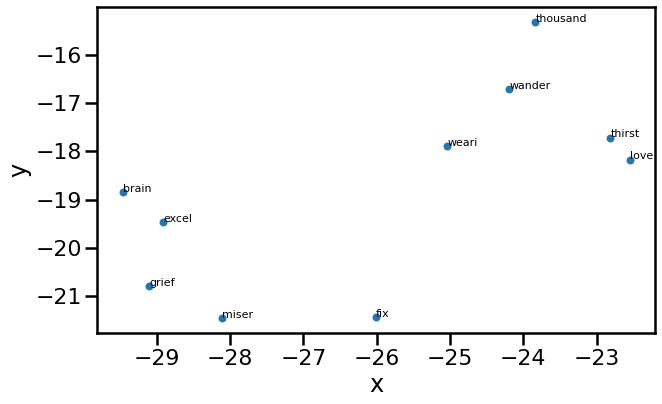

In [59]:
plot_region(x_bounds=(-30, -22), y_bounds=(-22, -15), points=points_en)

In [60]:
def most_sim(word):
  res = []
  vec = books2vec_de.wv.most_similar(word)
  for i in vec:
    res.append(i[0])
  return res

print(most_sim('realitat'), end='')
print()
print(most_sim('freiheit'), end='')
print()
print(most_sim('begriff'), end='')
print()

print(most_sim('mach'), end='')
print()

print(most_sim('mensch'), end='')
print()


['derselb', 'notwendigerweis', 'sof', 'raum', 'sukzessiv', 'objektiv', 'subjektiv', 'posteriori', 'grundet', 'jederzeit']
['eitel', 'pobel', 'schul', 'gegn', 'tafeln', 'nannt', 'begrenzt', 'streit', 'dahin', 'schiff']
['posteriori', 'derselb', 'einschrank', 'notwend', 'empir', 'bezog', 'sinnlich', 'beding', 'notwendigerweis', 'objektiv']
['fall', 'ganz', 'bring', 'durch', 'lass', 'entscheid', 'unnot', 'irgend', 'verwirr', 'streng']
['lust', 'hundert', 'leidend', 'schuf', 'erlos', 'stein', 'leidenschaft', 'leb', 'welt', 'schonheit']


In [123]:
def most_sim(word):
  res = []
  vec = books2vec_en.wv.most_similar(word)
  for i in vec:
    res.append(i[0])
  return res

print(most_sim('realiti'), end='')
print()
print(most_sim('freedom'), end='')
print()
print(most_sim('express'), end='')
print()

print(most_sim('done'), end='')
print()

print(most_sim('person'), end='')
print()


['schema', 'wherebi', 'homogen', 'percept', 'uniti', 'empir', 'rule', 'conform', 'form', 'demonstr']
['instinct', 'conflict', 'seemeth', 'preserv', 'servic', 'sentiment', 'domain', 'flatter', 'flash', 'deeper']
['shape', 'neither', 'shown', 'enclos', 'conclud', 'boundari', 'theolog', 'selfcontradictori', 'gradual', 'unchang']
['lay', 'support', 'feel', 'forget', 'run', 'toward', 'attack', 'head', 'control', 'slip']
['favour', 'detail', 'succeed', 'make', 'prevent', 'frequent', 'acquaint', 'habit', 'slightest', 'repeat']


In [61]:
books2vec_de.wv.most_similar("gericht")

[('angeleg', 0.9942026734352112),
 ('geleg', 0.9920567274093628),
 ('deshalb', 0.9907495975494385),
 ('sehr', 0.9904921054840088),
 ('allerding', 0.9903703331947327),
 ('jedenfall', 0.9891200661659241),
 ('anschein', 0.988641619682312),
 ('stellung', 0.9882925748825073),
 ('prozess', 0.9876524806022644),
 ('aufseh', 0.9874032139778137)]

In [62]:
books2vec_de.wv.most_similar("zuerst")

[('anfang', 0.9956960678100586),
 ('vorlauf', 0.9953039884567261),
 ('erklart', 0.9947320222854614),
 ('beobacht', 0.9938172101974487),
 ('ubrig', 0.9936887621879578),
 ('etwa', 0.9926613569259644),
 ('verhalt', 0.9922624826431274),
 ('richtig', 0.9920016527175903),
 ('angenomm', 0.9918599128723145),
 ('erfolg', 0.9916685223579407)]

In [63]:
lemmatize_text(stem_text(tokenize_preprocess("apfel"), 'german'))

['apfel']

In [64]:
books2vec_de.wv.most_similar("kritik")

[('kanon', 0.9992030262947083),
 ('transzendentalphilosophi', 0.9990890026092529),
 ('logisch', 0.9990764260292053),
 ('einteil', 0.9988487958908081),
 ('syst', 0.9988207221031189),
 ('prinzipi', 0.9988017082214355),
 ('obzwar', 0.9987750053405762),
 ('ide', 0.9986751079559326),
 ('verstandesgebrauch', 0.9985670447349548),
 ('anwend', 0.9984427690505981)]

In [81]:
books2vec_en.wv.most_similar(stem_text(["critique"], 'english')[0])

[('scienc', 0.9991210699081421),
 ('metaphys', 0.9986211061477661),
 ('faculti', 0.9985490441322327),
 ('transcendent', 0.9985018968582153),
 ('deduct', 0.9978875517845154),
 ('canon', 0.997827410697937),
 ('system', 0.9977976083755493),
 ('dialect', 0.9976186156272888),
 ('criterion', 0.997550368309021),
 ('philosophi', 0.9974795579910278)]

In [67]:
books2vec_de.wv.save_word2vec_format('word2vec_de_books.txt', binary=False)

In [68]:
books2vec_en.wv.save_word2vec_format('word2vec_en_books.txt', binary=False)

In [83]:
wv_from_text = KeyedVectors.load_word2vec_format('./mwm_de_to_en_emb', binary=False)

In [84]:
all_word_vectors_matrix_de_en = wv_from_text.vectors

In [85]:
all_word_vectors_matrix_2d_de_en = tsne.fit_transform(all_word_vectors_matrix_de_en)

In [86]:
points_de_en = pd.DataFrame(
    [(word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d_de_en[wv_from_text.key_to_index[word]])
            for word in wv_from_text.key_to_index
        ]],
    columns=["word", "x", "y"])

In [87]:
points_de_en[100:105]

,word,x,y
100,race,-8.379277,-66.359116
101,truli,-27.319681,-31.571337
102,widersprech,65.523354,-22.590416
103,individu,57.983353,21.618731
104,bruck,-37.747250,-19.811741


<AxesSubplot: xlabel='x', ylabel='y'>

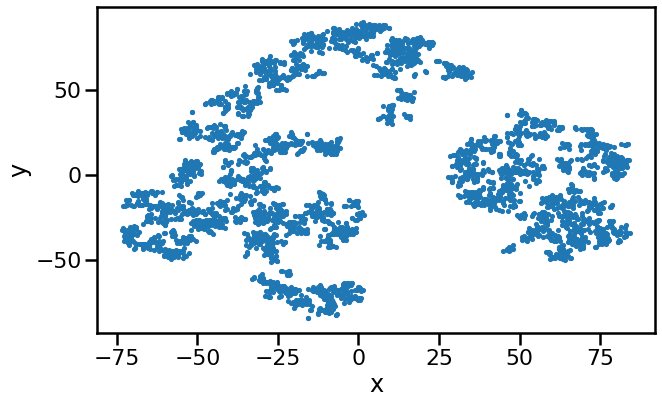

In [88]:
sns.set_context("poster")
points_de_en.plot.scatter("x", "y", s=10, figsize=(10, 6))

In [89]:
print(points_de_en[points_de_en.word == 'woman'])
print(points_de_en[points_de_en.word == 'frau'])

      word          x          y
175  woman -34.451077  37.499084
      word         x          y
1208  frau -2.134501  86.286873


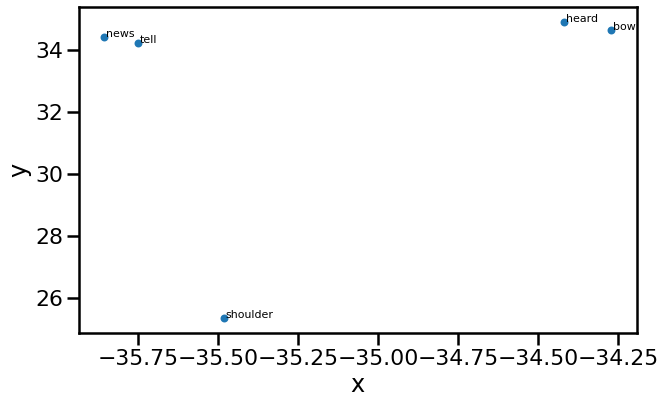

In [90]:
plot_region(x_bounds=(-36, -28), y_bounds=(25, 35), points=points_de_en)

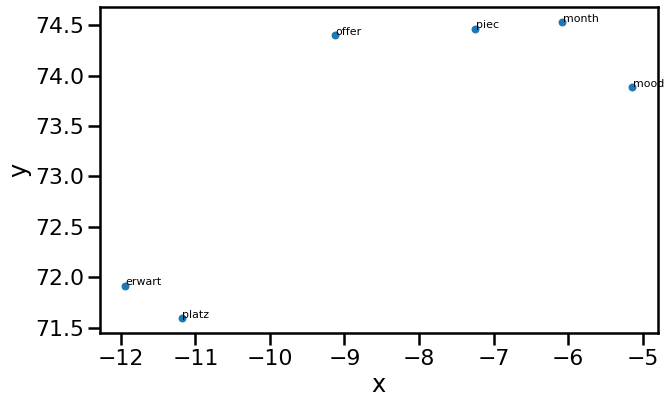

In [91]:
plot_region(x_bounds=(-12, -5), y_bounds=(65, 75), points=points_de_en)

In [92]:
wv_from_text.most_similar("kritik")

[('einteil', 0.9995660185813904),
 ('logisch', 0.9994993805885315),
 ('transzendentalphilosophi', 0.9994925260543823),
 ('deduktion', 0.9993278384208679),
 ('verstandesgebrauch', 0.9993067383766174),
 ('asthet', 0.9993054866790771),
 ('prinzipi', 0.9992549419403076),
 ('constitut', 0.9992440938949585),
 ('obzwar', 0.9992313981056213),
 ('anwend', 0.9992099404335022)]

In [93]:
wv_from_text.most_similar(stem_text(["critique"], 'english')[0])

[('scienc', 0.9994614124298096),
 ('faculti', 0.9992764592170715),
 ('transcendent', 0.9992455244064331),
 ('system', 0.999113142490387),
 ('dialekt', 0.9990352988243103),
 ('deduct', 0.9989998936653137),
 ('principl', 0.998959481716156),
 ('disziplin', 0.9989479184150696),
 ('divis', 0.9988740682601929),
 ('criterion', 0.9987690448760986)]

In [94]:
wv_from_text.most_similar(stem_text(["langsam"], 'german')[0])

[('erzahlt', 0.9946083426475525),
 ('blieb', 0.9937281012535095),
 ('wusst', 0.9931450486183167),
 ('ging', 0.9894510507583618),
 ('schien', 0.9892657399177551),
 ('nickt', 0.9865447282791138),
 ('gesprach', 0.9857309460639954),
 ('nonetheless', 0.9850618839263916),
 ('awar', 0.9836733937263489),
 ('fruh', 0.9834387302398682)]

In [100]:
wv_from_text.most_similar(stem_text(["slow"], 'english')[0])

[('train', 0.9913485050201416),
 ('burden', 0.9908667206764221),
 ('glad', 0.9847241044044495),
 ('inzwisch', 0.9846621155738831),
 ('along', 0.9835914969444275),
 ('edg', 0.9820855259895325),
 ('haus', 0.9820315837860107),
 ('verlang', 0.981532633304596),
 ('arbeitet', 0.981281578540802),
 ('crawl', 0.9807536602020264)]

In [95]:
wv_from_text.most_similar(stem_text(["girl"], 'english')[0])

[('onto', 0.9989466667175293),
 ('leant', 0.9986897110939026),
 ('corner', 0.9986864924430847),
 ('knock', 0.9984341263771057),
 ('pull', 0.9983049631118774),
 ('candl', 0.998186469078064),
 ('front', 0.9979668855667114),
 ('shout', 0.9977990388870239),
 ('grete', 0.9977447986602783),
 ('despit', 0.9976596236228943)]

In [96]:
wv_from_text.most_similar(stem_text(["ruhig"], 'german')[0])

[('klopft', 0.9980228543281555),
 ('bett', 0.9955872297286987),
 ('lock', 0.995252788066864),
 ('rief', 0.9947819113731384),
 ('half', 0.9945878982543945),
 ('jump', 0.9943204522132874),
 ('close', 0.9941284656524658),
 ('link', 0.9940930008888245),
 ('disturb', 0.9939619302749634),
 ('hilf', 0.9939426183700562)]

In [97]:
wv_from_text.most_similar(stem_text(["quiet"], 'english')[0])

[('anxious', 0.9986473917961121),
 ('tire', 0.9985820651054382),
 ('nice', 0.9982984066009521),
 ('slowli', 0.9982460737228394),
 ('morn', 0.9979190230369568),
 ('told', 0.9979020357131958),
 ('stood', 0.997614860534668),
 ('harder', 0.9969885349273682),
 ('lower', 0.996702253818512),
 ('went', 0.9964919090270996)]

In [98]:
wv_from_text.most_similar(stem_text(["woman"], 'english')[0])

[('upright', 0.9902364611625671),
 ('shook', 0.989928662776947),
 ('amaz', 0.988167941570282),
 ('clean', 0.9877632856369019),
 ('whisper', 0.9876068234443665),
 ('fetch', 0.9873238205909729),
 ('stretch', 0.9863342642784119),
 ('lift', 0.9859644174575806),
 ('home', 0.9854422807693481),
 ('wast', 0.9851903915405273)]

In [102]:
wv_from_text.most_similar(stem_text(["frau"], 'german')[0])

[('there', 0.9970430135726929),
 ('youll', 0.9969649910926819),
 ('normal', 0.9968729615211487),
 ('report', 0.9968563914299011),
 ('excus', 0.9967971444129944),
 ('youv', 0.9967154860496521),
 ('somebodi', 0.9966281056404114),
 ('wouldnt', 0.9965693950653076),
 ('what', 0.9965366721153259),
 ('cant', 0.9965158104896545)]

In [103]:
print(books2vec_en.wv.most_similar(stem_text(["process"], 'english')[0]))
print()
print(books2vec_de.wv.most_similar(stem_text(["prozess"], 'german')[0]))
print()
print(wv_from_text.most_similar(stem_text(["process"], 'english')[0]))
print()
print(wv_from_text.most_similar(stem_text(["prozess"], 'german')[0]))

[('afterward', 0.9969482421875), ('opposit', 0.9936248064041138), ('expo', 0.9929376840591431), ('whole', 0.9913681745529175), ('receiv', 0.9911811947822571), ('celebr', 0.9907275438308716), ('sophist', 0.9904658198356628), ('titl', 0.9902145862579346), ('util', 0.9898195862770081), ('unless', 0.989460825920105)]

[('angeklagt', 0.9963220953941345), ('beamt', 0.9957278370857239), ('allerding', 0.991021454334259), ('advokat', 0.9904416799545288), ('eingab', 0.9903302788734436), ('bank', 0.9888393878936768), ('gericht', 0.9876524209976196), ('geleg', 0.9839991927146912), ('gunstig', 0.9816752672195435), ('angeleg', 0.981302797794342)]

[('afterward', 0.9961298108100891), ('opposit', 0.9929925203323364), ('safe', 0.991935670375824), ('organ', 0.991128146648407), ('whole', 0.9910104870796204), ('receiv', 0.9909208416938782), ('celebr', 0.9900246262550354), ('expo', 0.98984694480896), ('erfull', 0.9898292422294617), ('accompani', 0.9896644353866577)]

[('angeklagt', 0.9984109401702881), ('b

In [105]:
print(wv_from_text.similarity(stem_text(["woman"], 'english')[0], stem_text(["frau"], 'german')[0]))
print(wv_from_text.similarity(stem_text(["man"], 'english')[0], stem_text(["mann"], 'german')[0]))

0.7469062
0.78916764


In [106]:
print(wv_from_text.similarity(stem_text(["logik"], 'german')[0], stem_text(["kritik"], 'german')[0]))
print(wv_from_text.similarity(stem_text(["logic"], 'english')[0], stem_text(["critique"], 'english')[0]))

0.9894415
0.99830693


In [107]:
print(wv_from_text.similarity(stem_text(["science"], 'english')[0], stem_text(["fuss"], 'german')[0]))
print(wv_from_text.similarity(stem_text(["foot"], 'english')[0], stem_text(["wissenschaft"], 'german')[0]))

-0.87435406
-0.9830226


In [108]:
print(wv_from_text.similarity(stem_text(["analogi"], 'german')[0], stem_text(["unit"], 'english')[0]))
print(wv_from_text.similarity(stem_text(["einheit"], 'german')[0], stem_text(["analog"], 'english')[0]))

0.9919791
0.9814287


In [124]:
def nearest_similarity_cosmul(start1, end1, start2):
    similarities = wv_from_text.most_similar_cosmul(
        positive=[start1, start2],
        negative=[end1])
    end2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return end2

In [125]:
nearest_similarity_cosmul("transzendental", "synthesis", stem_text(["selbst"], 'german')[0])
nearest_similarity_cosmul("samsa", stem_text(["schwester"], 'german')[0], stem_text(["vielleicht"], 'german')[0])

transzendental is related to synthesis, as selb is related to therebi
samsa is related to schwest, as vielleicht is related to everyth


'everyth'

In [127]:
nearest_similarity_cosmul("kaufmann", "geld", stem_text(["science"], 'english')[0])
nearest_similarity_cosmul("realiti", stem_text(["life"], 'english')[0], stem_text(["desire"], 'english')[0])

kaufmann is related to geld, as scienc is related to serv
realiti is related to life, as desir is related to mach


'mach'